In [132]:
library(tidyverse)
library(stringr)
stopif = function(x, ...) { stopifnot(! x, ...)}

# STATS 306
## Problem set 6: Strings and regular expressions
Each problem is worth two to four points, depending on difficulty, for a total of 20.

*Note*: you do not need to use `install.packages()` in this notebook. You may assume that we have already installed all of the necessary packages when we run your code.

#### Problem 1
Write a regular expression which matches words of the form `DcccccD`, where `D` is any digit and `c` is any lower case letter. The first and last digits do not have to be the same. Store your regular expression in a variable called `re1`.

In [133]:
re1 = NA
### BEGIN SOLUTION
re1 = "\\d[a-z]{5}\\d"
### END SOLUTION

In [134]:
matches = c("1abcde2", "1abcde1", "0fooof0")  # these should match
antimatches = c("f12300f", "any old words", "1a1", "2111112", "1234567890")  # these should not match
stopifnot(all(str_detect(matches, re1)))
stopif(any(str_detect(antimatches, re1)))
### BEGIN HIDDEN TESTS
print(list(student=re1, sol="\\d[a-z]{5}\\d"))
stopif(any(str_detect(c("1ABCDEF2", "2abCde3", "2-abcd-3"), re1)))
### END HIDDEN TESTS

$student
[1] "\\d[a-z]{5}\\d"

$sol
[1] "\\d[a-z]{5}\\d"



#### Problem 2
The *word-boundary* character class `\b` matches the beginning and end of a word:

In [4]:
str_view_all("These are some words.", "\\b")

HTML widgets cannot be represented in plain text (need html)

Use this character class to write a regular expression `re2` such that `str_count(s, re2)` counts the number of words in the string `s`. Here a word is defined a consecutive string of letters, numbers or underscores.

In [135]:
### BEGIN SOLUTION
re2 = "\\b\\w+\\b"
### END SOLUTION

In [137]:
stopifnot(all(
    str_count(
        c(
            "This sentence has five words.",
            "   three words here!",
            "\tfour words found here...",
            "hypenated-words count as two,",
            "but under_scores do not",
            "but isn't it true that contractions do? -- yes!"
         ),
        re2) == 
    c(5, 3, 4, 5, 4, 9)
))
### BEGIN HIDDEN TESTS
# solution:
# re2 = "\\b\\w+\\b"
stopifnot(all(
    str_count(
        c(
            "__--__",
            "aAabB cD",
            "!@#",
            "yargh#123#__123__\n788-981't"
         ),
        re2) == 
    c(2, 2, 0, 6)
))
### END HIDDEN TESTS

#### Problem 3
Write a regular expression which matches any word containing exactly two vowels, regardless of case. Store this regular expression in a variable named `re3`.

*Hint*: See `?stringr::regex` for documentation on how to produce a case-insensitive regexp.

In [138]:
### BEGIN SOLUTION
vow = "[aoeui]"
ocon = "[^aoeui]*"  # optional consonant
re3 = regex(str_interp("\\b(${ocon}${vow}${ocon}){2}\\b"), ignore_case = T)
### END SOLUTION

In [139]:
stopifnot(all(
    str_detect(
        c("one", "thrEe", "FOur", "FIVE", "seVen", "Eight", "nine"),
        re3
        )
    )
)

stopif(any(
    str_detect(
        c("two", "SIX", "TEN", "THirteeN"),
        re3
    )
))

### BEGIN HIDDEN TESTS
stopifnot(all(
    str_detect(
        c("aa", "ee", "EI", "aBa", "Ae"),
        re3
    )
))
# solution:
# vow = "[aoeui]"
# ocon = "[^aoeui]*"  # optional consonant
# re3 = regex(str_interp("\\b(${ocon}${vow}${ocon}){2}\\b"), ignore_case = T)
### END HIDDEN TESTS

#### Problem 4
Write a regular expression which matches proper nouns. A proper noun is defined as one or more capitalized words, optionally separated by the word(s) "and", "of", "the", and/or "by".  Store your expression in a variable called `re4`. (If a capitalized word occurs at the beginning of a sentence, you may assume it is part of a proper noun.)

In [155]:
re4 = NA
### BEGIN SOLUTION
cap = "[A-Z]+\\w*"
connector = "(and|of|the|or|by)"
re4 = str_interp("\\b((${cap}|${connector}) )*${cap}\\b")
### END SOLUTION

In [158]:
proper_nouns = c("Jabba the Hut", "Pizza Hut", 
                 "Pizza the Hut", "Chicken of the Sea",
                 "Dolce and Gabbana", "Roger Federer",
                 "A Streetcar Named Desire", "Twitter")
not_proper_nouns = c("no proper nouns here.",
                     "tennis is the best",
                     "i heart burritos!")
stopifnot(all(identical(proper_nouns,
                        str_extract(str_c("intro ", proper_nouns, " outro."), re4)
                        )))
stopifnot(all(identical(str_c("Proper ", proper_nouns),
                        str_extract(str_c("Proper ", proper_nouns, " outro."), re4)
                        )))
stopifnot(identical(
    str_extract_all("I heart Huckabees", re4),
    list(c("I", "Huckabees"))))

stopifnot(! any(str_detect(not_proper_nouns, re4)))
### BEGIN HIDDEN TESTS
# solution:
# cap = "[A-Z]+\\w*"
# connector = "(and|of|the|or|by)"
# re4 = str_interp("\\b((${cap}|${connector}) )*${cap}\\b")

proper_nouns = c("A", "KentuckyFriedChicken")
stopifnot(all(identical(proper_nouns, str_extract(proper_nouns, re4))))
not_proper_nouns = c("a", "1234")
stopifnot(! any(str_detect(not_proper_nouns, re4)))
### END HIDDEN TESTS

#### Problem 5
Write a regular expression to match phone numbers. A phone number can be in any one of the following forms:
```
(123) 456-7890
(123)456-7890
1234567890
123 456 7890
123-456-7890
123.456.7890
```
Store your regular expression in a variable called `re5`.

In [142]:
### BEGIN SOLUTION
re5_1 = "\\d{3}([-. ]?)\\d{3}\\2\\d{4}" # latter four cases.
# Note that backref=\\2 is needed here
# since we will be enclosing with additional parens for alternative match.
re5_2 = "\\(\\d{3}\\) ?\\d{3}-\\d{4}"
re5 = str_interp("^(${re5_1}|${re5_2})")
### END SOLUTION

In [143]:
phone_nums = c(
    "(123) 456-7890", "(123)456-7890", "1234567890",
    "123 456 7890", "123-456-7890", "123.456.7890")
not_phone_nums = c("123.456 7890", "123-456.7890", 
                   "(123 456 7890", "a23.b123.c1234",
                   "cleveland rocks"
                  )
stopifnot(all(str_detect(phone_nums, re5)))
stopifnot(! any(str_detect(not_phone_nums, re5)))
### BEGIN HIDDEN TESTS
# solution:
# re5_1 = "\\d{3}([-. ]?)\\d{3}\\2\\d{4}" # latter four cases.
# re5_2 = "\\(\\d{3}\\) ?\\d{3}-\\d{4}"
# re5 = str_interp("^(${re5_1}|${re5_2})")
phone_nums = c(
    "(123) 456-7890", "(123)456-7890", "1234567890",
    "123 456 7890", "123-456-7890", "123.456.7890")
not_phone_nums = c("123#456#7890", "123-456.7890", 
                   "(123-456.7890", "a23.b123.c1234",
                   "cleveland rocks",
                   " 1234567890"
                  )
stopifnot(all(str_detect(phone_nums, re5)))
stopifnot(! any(str_detect(not_phone_nums, re5)))
### END HIDDEN TESTS

#### Problem 6
In lecture we learned about the `str_trim` function, which trims leading and trailing whitespace from a string:

In [144]:
str_trim("   This will be trimmed ")

[1] "This will be trimmed"

Create a regular expression which, for a given string `s`, captures the trimmed version of `s` into group 1. That is, for any string `s`, calling `str_replace(s, re1, "\\1")` should produce the same output as `str_trim(s)`.
Store your expression in a variable called `re6`. 



In [145]:
### BEGIN SOLUTION
re6 = "^\\s*(.*[^\\s])\\s*$"
### END SOLUTION

In [146]:
for (s in c(
    "   this will  be trimmed   ",
    "\t\nso will this\n\t  ",
    "and this too    "
    )) {
    stopifnot(identical(
        str_replace(s, re6, "\\1"),
        str_trim(s)))
    }
### BEGIN HIDDEN TESTS
# solution:
# re6 = "^\\s*(.*[^\\s])\\s*$"
for (s in c(
    "  yes",
    "  yes  ",
    "yes  ",
    "no",
    "a",
    ""
    )) {
    stopifnot(identical(
        str_replace(s, re6, "\\1"),
        str_trim(s)))
    }
### END HIDDEN TESTS

### Reddit dataset
The file `reddit_xmas_2017.RData` contains 100,000 comments posted to Reddit on Christmas Day, 2017.

In [147]:
load('reddit_xmas_2017.RData')
reddit %>% print

# A tibble: 100,000 x 3
   author              body                                 created_utc        
   <chr>               <chr>                                <dttm>             
 1 br_shadow           Thank you for this, there is a pers… 2017-12-25 15:49:08
 2 Ksalol              They are not to quick actually. It'… 2017-12-25 17:42:50
 3 itscool83           tell her you guys should hang out w… 2017-12-25 18:54:13
 4 Glu7enFree          "Autism is a high honor in the tech… 2017-12-25 07:48:17
 5 Theotheogreato      "You thought a cat was your son?! "  2017-12-25 20:58:08
 6 Shadrac121          Hopfully she takes wat people say i… 2017-12-25 22:27:31
 7 1fzUjhemoSB1QV7zI7  Si ce propui sa facem cu toata piel… 2017-12-25 07:41:31
 8 MinisterOfEducation "I don't mean to be impolite, but i… 2017-12-25 19:28:35
 9 AabidS10            i dont have a 720p x265 of it, sorr… 2017-12-25 13:20:32
10 S3RG10              "I'm dying to try Guatemalan sandal… 2017-12-25 00:48:46
# ... with 99,99

Problems 7-9 ask you questions about this data set. Unless specified otherwise, all matches are case insensitive.

(*Disclaimer*: as we are all aware, the internet is filled with terrible people saying awful things. I filtered out objectionable comments as best I could, but you will certainly find more if you dig around this data for long enough.)

### Problem 7
Comment 174 wishes everyone a happy holidays:

In [130]:
reddit %>% slice(174)

author,body,created_utc
Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


What are other people wishing? Count the first occurrence of the string "Happy `<word>`" or "Merry `<word>`" in the comment body, if any, summarize the matches in a table called `table7`:

<table>
<thead><tr><th scope="col">greeting</th><th scope="col">n</th></tr></thead>
<tbody>
	<tr><td>Merry Christmas</td><td>2040           </td></tr>
	<tr><td>Happy Holidays </td><td> &mdash;           </td></tr>
	<tr><td>Happy To       </td><td>  &mdash;           </td></tr>
	<tr><td>Merry Xmas     </td><td>  &mdash;      </td></tr>
	<tr><td>Happy With     </td><td>   &mdash;           </td></tr>
	<tr><td>Happy Christmas</td><td>   &mdash;           </td></tr>
	<tr><td>Happy For      </td><td>   &mdash;           </td></tr>
	<tr><td>Happy Cake     </td><td>   &mdash;           </td></tr>
	<tr><td>Happy About    </td><td>   &mdash;           </td></tr>
	<tr><td>Happy And      </td><td>   &mdash;           </td></tr>
</tbody>
</table>

In [150]:
table7 <- NA
### BEGIN SOLUTION
table7 <- reddit %>% mutate(greeting = str_to_title(str_extract(body, regex("(happy|merry) \\w+", 
                                                                            ignore_case=T)))) %>% 
                     filter(!is.na(greeting)) %>% count(greeting) %>% top_n(10) %>% arrange(-n)
### END SOLUTION

Selecting by n


In [151]:
stopif(is.na(table7))
### BEGIN HIDDEN TESTS
table7_ans <- reddit %>% mutate(greeting = str_to_title(str_extract(body, regex("(happy|merry) \\w+", 
                                                                            ignore_case=T)))) %>% 
                     filter(!is.na(greeting)) %>% count(greeting) %>% top_n(10) %>% arrange(-n)
print(list(student=table7, sol=table7_ans))
stopifnot(all(table7_ans$n == arrange(table7, -n)$n))
### END HIDDEN TESTS

Selecting by n


$student
# A tibble: 10 x 2
   greeting            n
   <chr>           <int>
 1 Merry Christmas  2040
 2 Happy Holidays    477
 3 Happy To          102
 4 Merry Xmas         93
 5 Happy With         92
 6 Happy Christmas    44
 7 Happy For          39
 8 Happy Cake         28
 9 Happy About        27
10 Happy And          25

$sol
# A tibble: 10 x 2
   greeting            n
   <chr>           <int>
 1 Merry Christmas  2040
 2 Happy Holidays    477
 3 Happy To          102
 4 Merry Xmas         93
 5 Happy With         92
 6 Happy Christmas    44
 7 Happy For          39
 8 Happy Cake         28
 9 Happy About        27
10 Happy And          25



### Problem 8
The number of hourly mentions of the word `christmas`or `xmas` is:
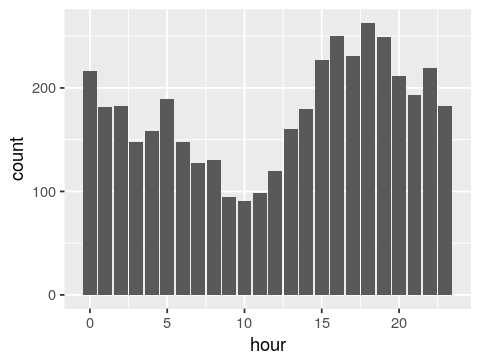

Make a similar plot for hourly mentions of "snow".

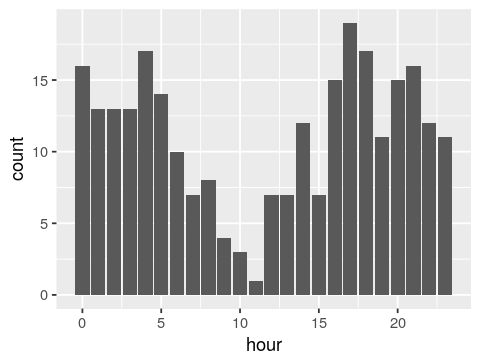

In [148]:
library(lubridate)
options(repr.plot.width=4, repr.plot.height=3)
reddit %>% mutate(hour=hour(created_utc)) %>% 
           filter(str_detect(body, regex("\snow", ignore_case = T))) %>% 
           ggplot + geom_bar(aes(x=hour))

### Problem 9
For this problem define a word to be alphanumeric characters surrounded by word boundaries, i.e. anything that matches the regular expression `re2` that you defined in problem 2. The most common word in the comments is "the", which occurs 81,104 times.

In [162]:
reddit %>% mutate(c=str_count(body, regex('\\bthe\\b', ignore_case = T))) %>% summarize(sum(c))

sum(c)
81104


The word `christmas` occurs 4265 times:

In [163]:
xmas_re <- regex('\\bchristmas\\b', ignore_case = T)
reddit %>% mutate(c=str_count(body, xmas_re)) %>% summarize(sum(c))

sum(c)
4265


The next most common word after "christmas" occurs 4151 times. What word is it? Store your answer in the variable `most_common_10`.

In [127]:
most_common_10 <- NA
### BEGIN SOLUTION
ds <- reddit %>% mutate(words=str_extract_all(body, regex("\\b\\w+\\b", ignore_case = T))) %>%
                 unnest %>% mutate(words = str_to_lower(words)) %>% count(words) %>% 
                 arrange(desc(n)) %>% mutate(k=row_number())
kstar <- filter(ds, words == "christmas")$k
most_common_10 <- filter(ds, k == kstar + 1)$words
### END SOLUTION

In [153]:
stopif(is.na(most_common_10))
### BEGIN HIDDEN TESTS
ds <- reddit %>% mutate(words=str_extract_all(body, regex("\\b\\w+\\b", ignore_case = T))) %>%
                 unnest %>% mutate(words = str_to_lower(words)) %>% count(words) %>% 
                 arrange(desc(n)) %>% mutate(k=row_number())
kstar <- filter(ds, words == "christmas")$k
most_common_10_ans <- filter(ds, k == kstar + 1)$words
print(list(student=most_common_10, sol=most_common_10_ans))
stopifnot(most_common_10 == most_common_10_ans)
### END HIDDEN TESTS

$student
[1] "only"

$sol
[1] "only"

